In [10]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import os

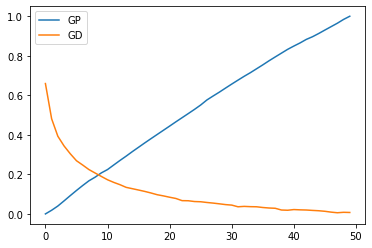

In [11]:
# 读取文件数据
def read_G(your_name):
    GD = []
    GP = []

    f_P = open(f"{your_name}-GP.txt", 'r')
    f_D = open(f"{your_name}-GD.txt", 'r')
    for each_P in f_P:
        GP.append(float(each_P.replace('\n', '')))
    for each_D in f_D:
        GD.append(float(each_D.replace('\n', '')))
    
    return abs(np.array(GP)), abs(np.array(GD))
GP, GD = read_G('qxs')
GP_nor = (GP-min(GP))/(max(GP)-min(GP))
GD_nor = (GD-min(GP))/(max(GP)-min(GP))
plt.plot(GP_nor, label='GP')
plt.plot(GD_nor, label='GD')
plt.legend()
plt.show()

In [12]:
# 电导拟合公式
def GP_fit(P, A, B, Gmin=min(GP_nor), Pmin=0):
    G = B * (1 - np.exp(-P / A)) + Gmin
    return G
def GD_fit(P, A, B, Gmax=max(GD_nor), Pmax=len(GD)):
    G = -B * (1 - np.exp((P-Pmax) / A)) + Gmax
    return G

d:\Software\Anaconda\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


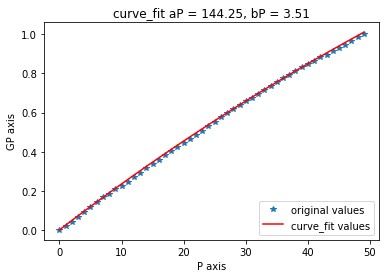

In [13]:
# np.random.seed(0)
# yP 段拟合数据
xP = np.array(range(50))
yP = GP_nor
err_stdev = 0 # 0.2
yP_noise = err_stdev * np.random.normal(size=yP.size)
yP_data = yP + yP_noise
popt, pcov = curve_fit(GP_fit, xP, yP_data)#训练函数
A = popt[0]
B = popt[1]
yPvals=GP_fit(xP, A, B)
plt.plot(xP, yP, '*',label='original values')
plt.plot(xP, yPvals, 'r',label='curve_fit values')
# plt.ylim(0, 1)
plt.xlabel('P axis')
plt.ylabel('GP axis')
plt.legend(loc=4)
plt.title(f"curve_fit aP = %0.2f, bP = %0.2f" %(A, B))
plt.show()

d:\Software\Anaconda\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


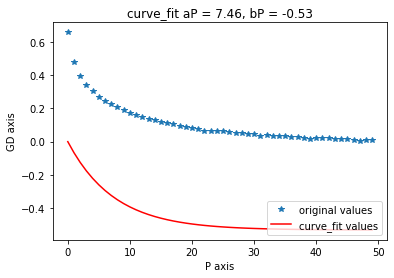

In [14]:
np.random.seed(0)
# yP 段拟合数据
xD = np.array(range(50))
yD = GD_nor
err_stdev = 0 # 0.2
yD_noise = err_stdev * np.random.normal(size=yD.size)
yD_data = yD + yD_noise
popt, pcov = curve_fit(GP_fit, xD, yD_data)#训练函数
A = popt[0]
B = popt[1]
yDvals=GP_fit(xD, A, B)
plt.plot(xP, yD_data, '*',label='original values')
plt.plot(xP, yDvals, 'r',label='curve_fit values')
# plt.ylim(0, 1)
plt.xlabel('P axis')
plt.ylabel('GD axis')
plt.legend(loc=4)
plt.title(f"curve_fit aP = %0.2f, bP = %0.2f" %(A, B))
plt.show()